In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [132]:
df=pd.read_csv('appdata10.csv')

In [133]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [135]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
df['hour'] =  df.hour.str.slice(1,3).astype(int)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [138]:
sns.set_style('whitegrid')

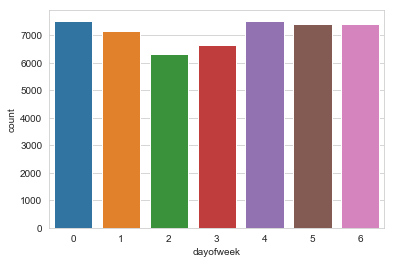

In [139]:
sns.countplot(df['dayofweek'])

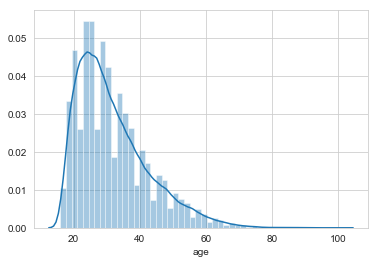

In [140]:
sns.distplot(df['age'])

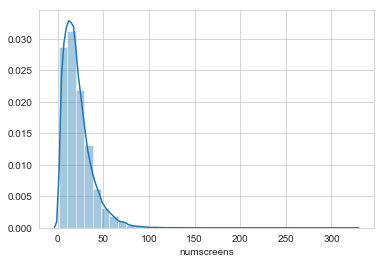

In [141]:
sns.distplot(df['numscreens'],bins=35)

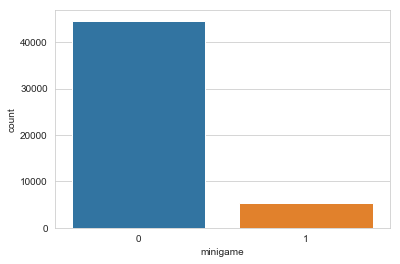

In [142]:
sns.countplot(df['minigame'])

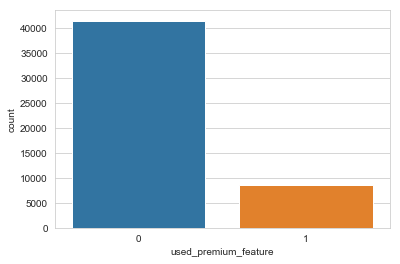

In [143]:
sns.countplot(df['used_premium_feature'])

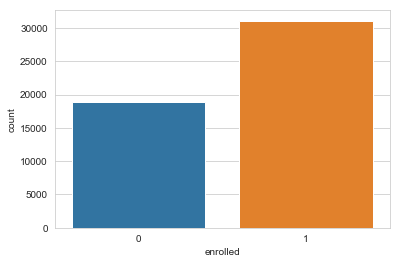

In [144]:
sns.countplot(df['enrolled'])

In [145]:
df2=df.drop(['user','first_open','hour','screen_list','enrolled_date'],axis=1)

In [146]:
df2.head()

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,23,15,0,0,0,0
1,6,24,13,0,0,0,0
2,1,23,3,0,1,0,1
3,4,28,40,0,0,1,0
4,1,31,32,0,0,1,1


In [147]:
df2.corrwith(df2.enrolled)

dayofweek               0.011326
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
enrolled                1.000000
liked                  -0.007022
dtype: float64

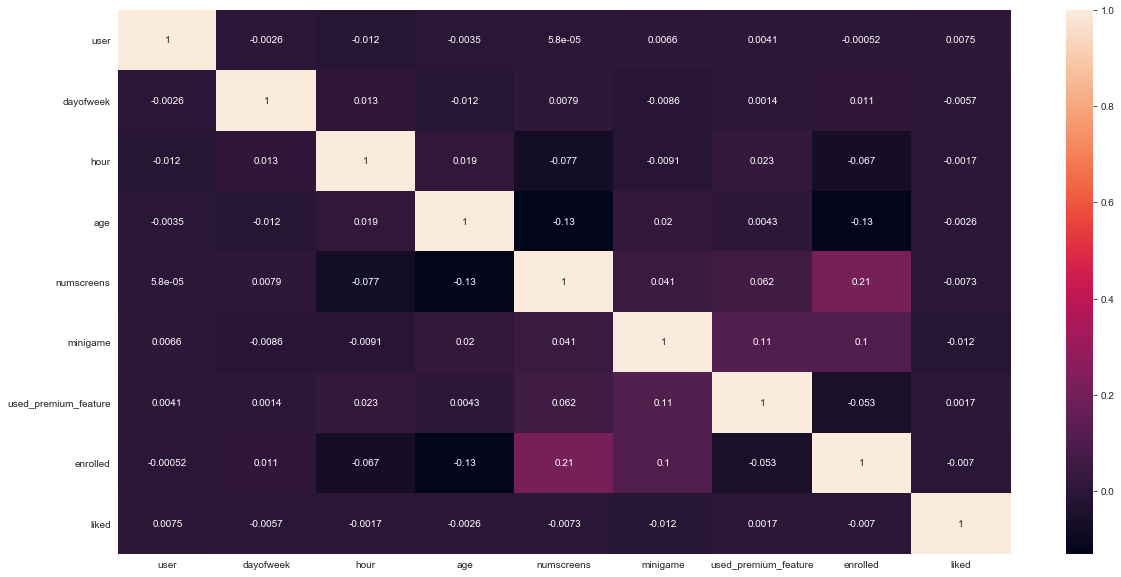

In [148]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

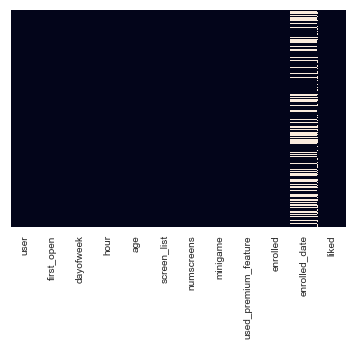

In [149]:
sns.heatmap(df.isnull(),yticklabels=False , cbar=False)

In [150]:
df['first_open'] =[ parser.parse(x) for x in df['first_open']]

In [151]:
df['enrolled_date'] = [parser.parse(x)  if isinstance (x,str) else  x for x in df['enrolled_date'] ]

In [178]:
df['differnce'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

In [179]:
df['differnce'].head()

0    NaN
1    NaN
2    NaN
3    0.0
4    0.0
Name: differnce, dtype: float64

In [180]:
df.drop(['first_open','enrolled_date'],axis=1 ,inplace=True)

In [181]:
df['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

(array([22213.,   580.,   392.,   363.,   444.,   263.,   145.,   143.,
          119.,   255.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

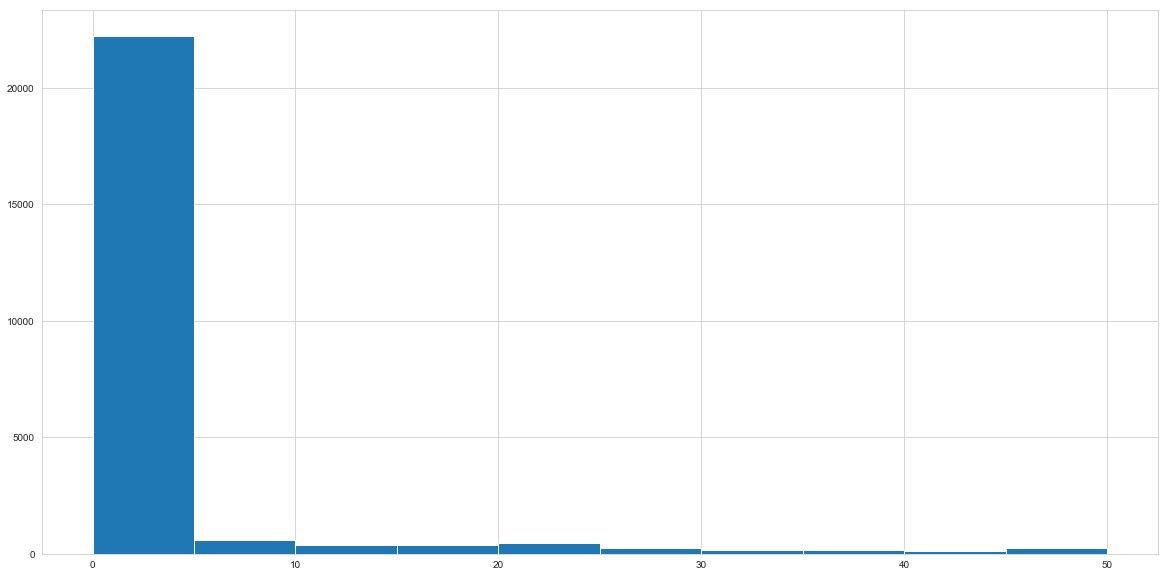

In [185]:
plt.figure(figsize=(20,10))
plt.hist(df['differnce'].dropna(),range=[0,50])

In [183]:
df[df['differnce']<48].count()

user                    24787
dayofweek               24787
hour                    24787
age                     24787
screen_list             24787
numscreens              24787
minigame                24787
used_premium_feature    24787
enrolled                24787
liked                   24787
differnce               24787
dtype: int64

In [186]:
df.loc[df['differnce']>48,'enrolled'] = 0

In [187]:
df['enrolled'].value_counts()

0    25150
1    24850
Name: enrolled, dtype: int64

In [189]:
top_screens =pd.read_csv('top_screens.csv',index_col=0)

In [192]:
top_screens=top_screens['top_screens']

In [196]:
df['screen_list'] = df['screen_list'].astype(str) + ','

In [197]:
df['screen_list'].head()

0    idscreen,joinscreen,Cycle,product_review,ScanP...
1    joinscreen,product_review,product_review2,Scan...
2                                  Splash,Cycle,Loan,,
3    product_review,Home,product_review,Loan3,Finan...
4    idscreen,joinscreen,Cycle,Credit3Container,Sca...
Name: screen_list, dtype: object

In [198]:
for sc in top_screens:
    df[sc] = df['screen_list'].str.contains(sc).astype(int)
    df['screen_list'] = df['screen_list'].str.replace(sc+',','')

In [200]:
df['Others'] = df['screen_list'].str.count(',')

In [201]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Others
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,254414,1,19,23,",",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,11


In [202]:
df.drop(columns=['screen_list'],axis=1,inplace=True)

In [352]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,differnce,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savings_count,CM_count,CC_count,Loan_count
0,235136,3,2,23,15,0,0,0,0,NaN,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,NaN,...,0,0,0,0,0,6,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,NaN,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,0.0,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0.0,...,0,0,0,0,0,11,0,2,0,1


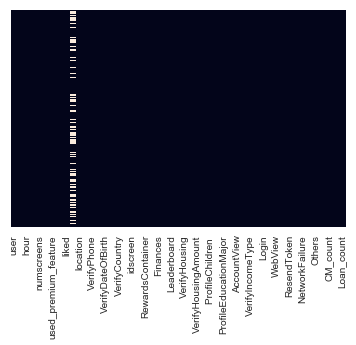

In [354]:
sns.heatmap(df.isnull(),yticklabels=False ,cbar = False)

In [360]:
df.fillna(value=0,inplace=True)

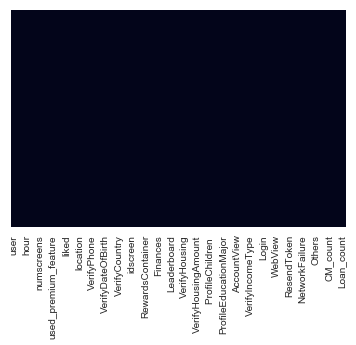

In [361]:
sns.heatmap(df.isnull(),yticklabels=False ,cbar = False)

In [362]:
saving_screen = ["Saving1",
                 "Saving2",
                 "Saving2Amount",
                 "Saving4",
                 "Saving5",
                 "Saving6",
                 "Saving7",
                 "Saving8",
                 "Saving9",
                 "Saving10"]

In [206]:
df.drop(columns=saving_screen,axis=1,inplace=True)

In [364]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,differnce,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savings_count,CM_count,CC_count,Loan_count
0,235136,3,2,23,15,0,0,0,0,0.0,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,0.0,...,0,0,0,0,0,6,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0.0,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,0.0,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0.0,...,0,0,0,0,0,11,0,2,0,1


In [209]:
cm_screen = ["Credit1",
             "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]
cc_screen = ["CC1",
             "CC1Category",
             "CC3"]
loan_screen =["Loan",
             "Loan2",
             "Loan3",
             "Loan4"]

In [210]:
df['CM_count'] = df[cm_screen].sum(axis=1)
df['CC_count']=df[cc_screen].sum(axis=1)
df['Loan_count'] =df [loan_screen].sum(axis=1)

In [211]:
df.drop(columns=cm_screen,axis=1,inplace=True)
df.drop(columns=cc_screen,axis=1,inplace=True)
df.drop(columns=loan_screen,axis=1,inplace=True)

In [268]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,differnce,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savings_count,CM_count,CC_count,Loan_count
0,235136,3,2,23,15,0,0,0,0,NaN,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,NaN,...,0,0,0,0,0,6,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,NaN,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,0.0,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0.0,...,0,0,0,0,0,11,0,2,0,1


In [366]:
df['location'].value_counts()

1    25888
0    24112
Name: location, dtype: int64

In [367]:
from sklearn.model_selection import train_test_split

In [386]:
X = df.drop(columns=['enrolled'],axis=1)
y=df['enrolled']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [387]:
train_id = df['user']
test_id = df['user']


In [388]:
X_train.drop(columns=['user'],axis=1,inplace=True)
X_test.drop(columns=['user'],axis=1,inplace=True)

C:\Users\Jatin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [389]:
from sklearn.preprocessing import StandardScaler

In [391]:
scaler = StandardScaler()

In [393]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,differnce,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savings_count,CM_count,CC_count,Loan_count
859,1,3,36,22,0,0,1,0.0,0,1,...,0,0,0,0,0,8,0,1,0,1
26729,2,8,30,9,0,0,0,0.0,1,0,...,0,0,0,0,0,4,0,1,0,0
44459,5,20,38,5,0,0,0,61.0,0,0,...,0,0,0,0,0,3,0,0,0,0
12310,0,19,17,13,0,0,1,0.0,0,1,...,0,0,0,0,0,5,0,1,0,1
6334,1,0,36,30,0,0,0,0.0,1,1,...,0,0,0,0,0,6,0,3,0,1


In [394]:
scaler.fit(X_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [395]:
scaled_train = scaler.transform(X_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [396]:
scaler.fit(X_test)
scaled_test = scaler.transform(X_test)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [397]:
scaled_train = pd.DataFrame(scaled_train,columns=X_train.columns)

In [398]:
scaled_test = pd.DataFrame(scaled_test,columns=X_test.columns)

In [399]:
y_test = y_test.fillna(0)

In [400]:
y_train =y_train.fillna(0)

In [401]:
from sklearn.linear_model import LogisticRegression

In [402]:
classifier = LogisticRegression(random_state=0)

In [403]:
classifier.fit(scaled_train,y_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [404]:
pred = classifier.predict(scaled_test)

In [405]:
from sklearn.metrics import confusion_matrix ,classification_report

In [406]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5044
           1       0.80      0.80      0.80      4956

   micro avg       0.81      0.81      0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [407]:
print(confusion_matrix(y_test,pred))

[[4076  968]
 [ 976 3980]]


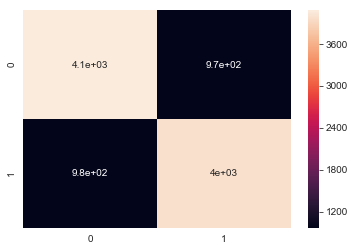

In [412]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [413]:
final_result = pd .concat([test_id , y_test],axis=1).dropna()

In [415]:
final_result['Prediction'] = pred

In [421]:
final_result.reset_index(drop =True)

,user,enrolled,Prediction
0,333588,0.0,1
1,144649,0.0,1
2,165432,1.0,0
3,180427,1.0,0
4,85089,0.0,1
5,310250,0.0,1
6,171351,1.0,1
7,349927,1.0,1
8,187179,0.0,0
9,17739,1.0,1
